# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply scenario discovery

1. Generate 10 policies and 1000 scenarios and evaluate them.
2. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop`*
3. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability


In [1]:
from lakemodel_function import lake_problem
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model)
import pandas as pd
from ema_workbench.analysis import prim
import numpy as np
import matplotlib as plt

In [2]:
from lakemodel_function import lake_problem

from ema_workbench import (Model, RealParameter, ScalarOutcome)

#instantiate the model
lake_model = Model('lakeproblem', function=lake_problem)
lake_model.time_horizon = 100 # used to specify the number of timesteps

#specify uncertainties
lake_model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                            RealParameter('stdev', 0.001, 0.005),
                            RealParameter('b', 0.1, 0.45),
                            RealParameter('q', 2.0, 4.5),
                            RealParameter('delta', 0.93, 0.99)]

# set levers, one for each time step
lake_model.levers = [RealParameter(f"l{i}", 0, 0.1) for i in 
                     range(lake_model.time_horizon)] # we use time_horizon here

#specify outcomes 
lake_model.outcomes = [ScalarOutcome('max_P'),
                       ScalarOutcome('utility'),
                       ScalarOutcome('inertia'),
                       ScalarOutcome('reliability')] #  ScalarOutcome.MINIMIZE???

In [3]:
from ema_workbench import MultiprocessingEvaluator

n_scenarios = 1000
n_policies = 10

with MultiprocessingEvaluator(lake_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(n_scenarios, n_policies)

In [4]:
experiments

,b,delta,mean,q,stdev,l0,l1,l10,l11,l12,...,l93,l94,l95,l96,l97,l98,l99,scenario,policy,model
0,0.111929,0.978671,0.039470,2.239159,0.002189,0.010999,0.026942,0.068308,0.094199,0.016568,...,0.094904,0.018556,0.000977,0.050910,0.036288,0.049827,0.034512,0,0,lakeproblem
1,0.314305,0.970180,0.021157,2.685474,0.002218,0.010999,0.026942,0.068308,0.094199,0.016568,...,0.094904,0.018556,0.000977,0.050910,0.036288,0.049827,0.034512,1,0,lakeproblem
2,0.221196,0.978168,0.024667,4.376538,0.002708,0.010999,0.026942,0.068308,0.094199,0.016568,...,0.094904,0.018556,0.000977,0.050910,0.036288,0.049827,0.034512,2,0,lakeproblem
3,0.139908,0.932548,0.015940,4.492130,0.004402,0.010999,0.026942,0.068308,0.094199,0.016568,...,0.094904,0.018556,0.000977,0.050910,0.036288,0.049827,0.034512,3,0,lakeproblem
4,0.157224,0.935670,0.017001,3.889681,0.003745,0.010999,0.026942,0.068308,0.094199,0.016568,...,0.094904,0.018556,0.000977,0.050910,0.036288,0.049827,0.034512,4,0,lakeproblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.181056,0.989525,0.018732,2.779155,0.001840,0.096397,0.093003,0.085891,0.001921,0.007836,...,0.042485,0.078131,0.016594,0.073005,0.077749,0.035607,0.055734,995,9,lakeproblem
9996,0.276287,0.986521,0.029198,3.975780,0.002065,0.096397,0.093003,0.085891,0.001921,0.007836,...,0.042485,0.078131,0.016594,0.073005,0.077749,0.035607,0.055734,996,9,lakeproblem
9997,0.211393,0.930075,0.040335,3.775136,0.003454,0.096397,0.093003,0.085891,0.001921,0.007836,...,0.042485,0.078131,0.016594,0.073005,0.077749,0.035607,0.055734,997,9,lakeproblem
9998,0.288403,0.975808,0.017174,2.333370,0.001925,0.096397,0.093003,0.085891,0.001921,0.007836,...,0.042485,0.078131,0.016594,0.073005,0.077749,0.035607,0.055734,998,9,lakeproblem


In [5]:
droplist = []
for x in range (100):
    lever = "l"+str(x)
    droplist.append("l"+str(x))

print(droplist)

['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9', 'l10', 'l11', 'l12', 'l13', 'l14', 'l15', 'l16', 'l17', 'l18', 'l19', 'l20', 'l21', 'l22', 'l23', 'l24', 'l25', 'l26', 'l27', 'l28', 'l29', 'l30', 'l31', 'l32', 'l33', 'l34', 'l35', 'l36', 'l37', 'l38', 'l39', 'l40', 'l41', 'l42', 'l43', 'l44', 'l45', 'l46', 'l47', 'l48', 'l49', 'l50', 'l51', 'l52', 'l53', 'l54', 'l55', 'l56', 'l57', 'l58', 'l59', 'l60', 'l61', 'l62', 'l63', 'l64', 'l65', 'l66', 'l67', 'l68', 'l69', 'l70', 'l71', 'l72', 'l73', 'l74', 'l75', 'l76', 'l77', 'l78', 'l79', 'l80', 'l81', 'l82', 'l83', 'l84', 'l85', 'l86', 'l87', 'l88', 'l89', 'l90', 'l91', 'l92', 'l93', 'l94', 'l95', 'l96', 'l97', 'l98', 'l99']


In [6]:
adjusted_experiments= experiments.drop(droplist, axis=1)

In [7]:
adjusted_experiments

,b,delta,mean,q,stdev,scenario,policy,model
0,0.111929,0.978671,0.039470,2.239159,0.002189,0,0,lakeproblem
1,0.314305,0.970180,0.021157,2.685474,0.002218,1,0,lakeproblem
2,0.221196,0.978168,0.024667,4.376538,0.002708,2,0,lakeproblem
3,0.139908,0.932548,0.015940,4.492130,0.004402,3,0,lakeproblem
4,0.157224,0.935670,0.017001,3.889681,0.003745,4,0,lakeproblem
...,...,...,...,...,...,...,...,...
9995,0.181056,0.989525,0.018732,2.779155,0.001840,995,9,lakeproblem
9996,0.276287,0.986521,0.029198,3.975780,0.002065,996,9,lakeproblem
9997,0.211393,0.930075,0.040335,3.775136,0.003454,997,9,lakeproblem
9998,0.288403,0.975808,0.017174,2.333370,0.001925,998,9,lakeproblem


In [8]:
outcomes['reliability'] 

array([0.03  , 0.2807, 0.7403, ..., 0.0809, 0.0698, 0.4165])

In [9]:
outcomes = pd.DataFrame.from_dict(outcomes)

In [10]:
outcomes

,max_P,utility,inertia,reliability
0,9.864054,0.752980,0.575758,0.0300
1,3.390573,0.560650,0.575758,0.2807
2,4.922283,0.738941,0.575758,0.7403
3,7.781799,0.234105,0.575758,0.2052
4,6.934402,0.247063,0.575758,0.1833
...,...,...,...,...
9995,5.938466,1.243241,0.646465,0.0600
9996,0.415666,1.107270,0.646465,1.0000
9997,5.221312,0.326616,0.646465,0.0809
9998,3.593959,0.774637,0.646465,0.0698


In [11]:
a = outcomes

In [12]:
lowest_reliability = outcomes.nsmallest(1000, "reliability")

In [13]:
lowest_reliability_df = lowest_reliability["reliability"]

In [14]:
lowest_reliability_df.max()

0.05000000000000004

In [15]:
x = adjusted_experiments
y = outcomes['reliability'] <lowest_reliability_df.max()
prim_alg = prim.Prim(x, y, threshold=0.1, peel_alpha = 0.11)
box1 = prim_alg.find_box()

AttributeError: module 'matplotlib' has no attribute 'show'

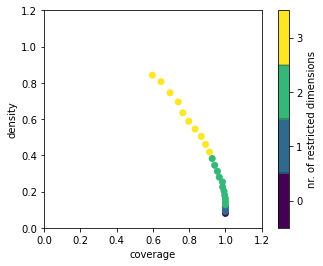

In [16]:
box1.show_tradeoff()
plt.show()

In [28]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage           1
density     0.127157
id                 4
mass           0.626
mean        0.127157
res_dim            2
Name: 4, dtype: object

      box 4                                         
        min       max                      qp values
b  0.100098  0.346474  [-1.0, 5.918553827547104e-24]
q  2.001124  4.236764  [-1.0, 0.0002854086507760177]



AttributeError: module 'matplotlib' has no attribute 'show'

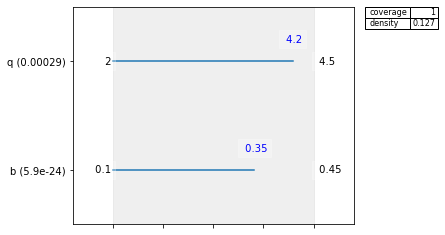

In [27]:
box1.inspect(4)
box1.inspect(4, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

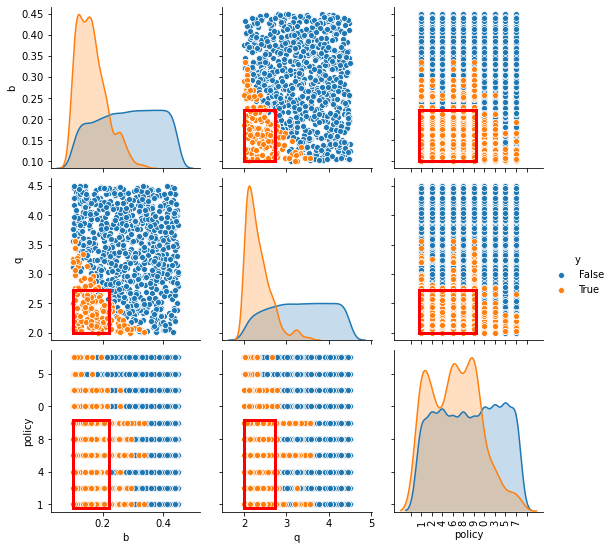

In [29]:
box1.select(23)
fig = box1.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

## Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

AttributeError: module 'matplotlib' has no attribute 'show'

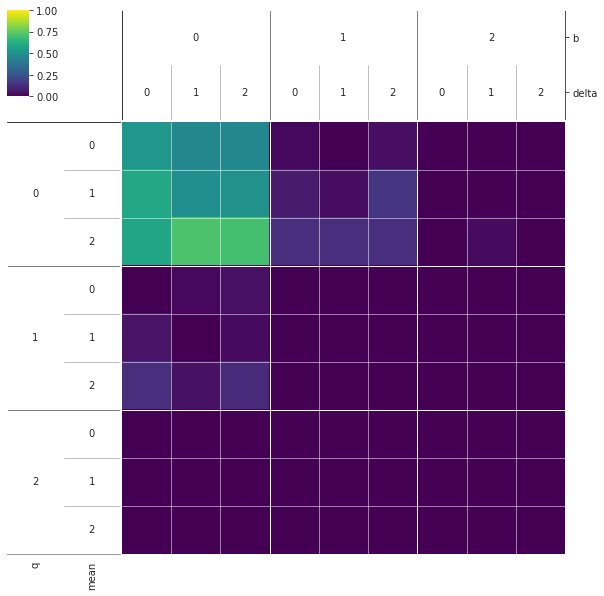

In [20]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['reliability'] <lowest_reliability_df.max()
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()